# Homework 4: Text Classification

In this homework, you will work with a dataset composed of the posts from Tweetter. The goal is to identify if there is an emergency information in the tweet or not. This is a binary classification task.

\

We will use a dataset from Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data Download train.csv and test.csv files. The code below will split the first file into train and validation sets.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
data = pd.read_csv('train.csv')

In [88]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Q1 (1pt)

Print information about missing values. Fill in missing values with an empty string [Example in SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/SGD.ipynb)

In [89]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [90]:
data.fillna('', inplace=True)

In [91]:
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [92]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


Now we will split our data into Test, Validation, and Test sets. You don't want to use Test set untill Q10.

In [93]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.3, random_state=42)

In [94]:
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


## Q2 (2pt)

1. What is the distribution of the classes in the Training set?

2. Plot the bar-plot for 10 mostly frequent values in column "keyword".

Comment on the information you've seen. [EDA notbook could be helpful](https://github.com/anton-selitskiy/RIT_ML/blob/main/EDA_and_Pipeline1.ipynb)

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(1,1))

In [96]:
X_train_transformed = vec.fit_transform(train['keyword'])
#X_test_transformed = vec.transform(test)

In [97]:
keyword_dictionary = list(vec.vocabulary_.items())
sorted_keyword_dictionary = dict(sorted(keyword_dictionary, key=lambda item: item[1], reverse=True))

# Convert the sorted dictionary back to a list of tuples
sorted_keyword_items = list(sorted_keyword_dictionary.items())

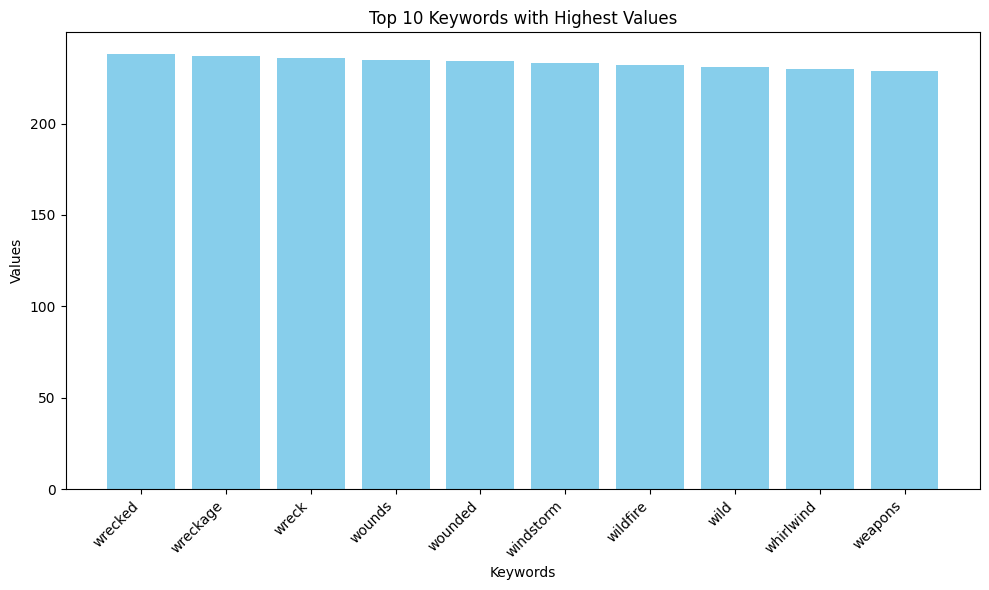

In [98]:
# Assuming you already have sorted_keyword_items from the previous code
top_10_keywords = sorted_keyword_items[:10]

# Extracting keywords and values for plotting
keywords, values = zip(*top_10_keywords)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(keywords, values, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Values')
plt.title('Top 10 Keywords with Highest Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


## Q3 (1pt)

Join text columns in a new column and delete the column with id.

In [99]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


In [116]:
# data['text'] = data['keyword'] + data['location'] + data['text']
#data['merged'] = pd.concat([data[1], data[2]])
#data.drop(['id', 'keyword', 'location'], axis=1, inplace=True)

data['text'] = data['location'] + data['text']
data.head()

KeyError: 'location'

## Q4 (1pt)

Work with train set.

1. Transform the data using CountVectorizer.
2. What is the shape of the resulted matrix?


In [101]:
from sklearn.feature_extraction.text import CountVectorizer

## Q5 (2pt)

The matrix in the previous question has many columns. Let's take a look at the dictionary of tokens, method *.vocabulary_* of CountVectorizer object.

1. Find all the words in this dictionary that contain digits. How many such words were found?

2. Find all the words that contain punctuation characters. How many such words were found?

In [102]:
import re

## Q6 (1pt)

During the lecture, we learned that there is a special text tokenizer in NLTK called *TweetTokenizer.* Let's try to apply *CountVectorizer* with this tokenizer. Answer all the questions from the previous section using TweetTokenizer and compare the results.

In [103]:
from nltk.tokenize import TweetTokenizer

## Q7 (4pt)

In scikit-learn, we can evaluate the process of counting matrices using CountVectorizer. CountVectorizer, like other inheritors of the _VectorizerMixin, has arguments tokenizer and preprocessor. The preprocessor is applied at the very beginning to each line of your dataset, while the tokenizer should take a string and return tokens.

Let's write a custom tokenizer that will do everything we need:

1. Convert all letters to lowercase.
2. Split the text into tokens using *TweetTokenizer* from the *nltk* package.
3. Remove all tokens that contain non-Latin characters, except for emojies (we'll consider tokens containing only punctuation and at least one parenthesis as emoticons) and hashtags that contain only Latin letters after the initial #.
4. Remove all tokens listed in nltk.corpus.stopwords.words('english').
5. Perform stemming using *SnowballStemmer.*

Demonstrate the operation of your function on the first text in the training dataset. You can access it by *.iloc[0]*

Usefull site on regular expressions: https://regex101.com/

In [104]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [105]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [106]:
stemmer = SnowballStemmer('english')

In [107]:
def custom_tokenizer(text):
    # Lowercase transformation
    text =

    # Tokenize using TweetTokenizer
    tokens =

    # Filter tokens based on criteria
    filtered_tokens = []
    for token in tokens:
        # Keep tokens that contain only Latin characters, "smileys", or valid hashtags


    # Remove stopwords
    filtered_tokens =

    # Perform stemming
    stemmed_tokens =

    return stemmed_tokens

SyntaxError: invalid syntax (<ipython-input-107-caac166c2bdf>, line 3)

## Q8 (2pt)

1. Apply *CountVectorizer* with your tokenizer to the Train and Validation sets.
2. Train *LogisticRegression* on the features obtained.
3. Calculate f1-score on the validation set.

In [ ]:
from sklearn.linear_model import LogisticRegression

## Q9 (2pt)

1. Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

2. We can further reduce the size of our matrix by discarding *df* values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

3. We can also reduce the size of the matrix by removing words with very small *df* values. Were you able to improve the quality by doing this?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Q10 (2pt)

Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

## Q11 (2pt)
Visualize the most important features.